Initial data view:
   temperature   humidity        ph  water availability season label
0    20.879744  82.002744  6.502985          202.935536  rainy  rice
1    21.770462  80.319644  7.038096          226.655537  rainy  rice
2    23.004459  82.320763  7.840207          263.964248  rainy  rice
3    26.491096  80.158363  6.980401          242.864034  rainy  rice
4    20.130175  81.604873  7.628473          262.717340  rainy  rice

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   season              1400 non-null   object 
 5   label               1400 non-null   object 
dtypes: float64(4), object(2)
memory usage: 65.8+ 

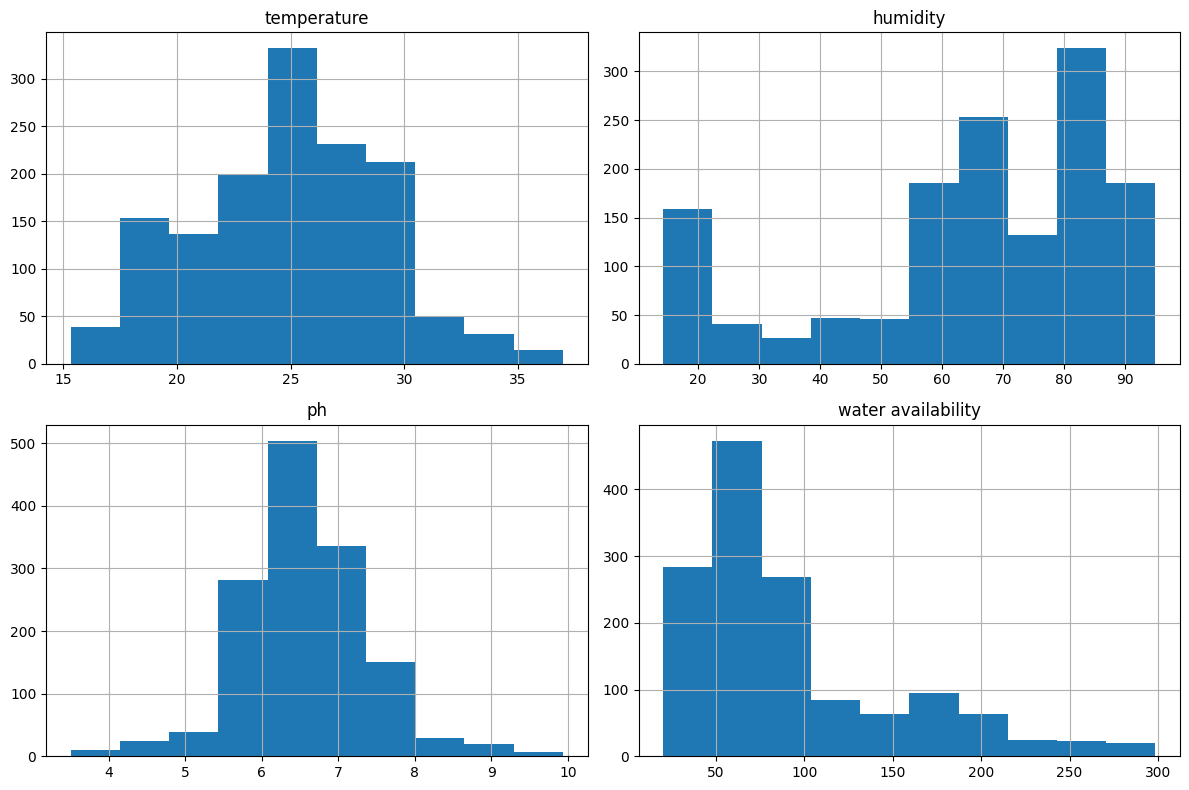

Box plot before removing outliers


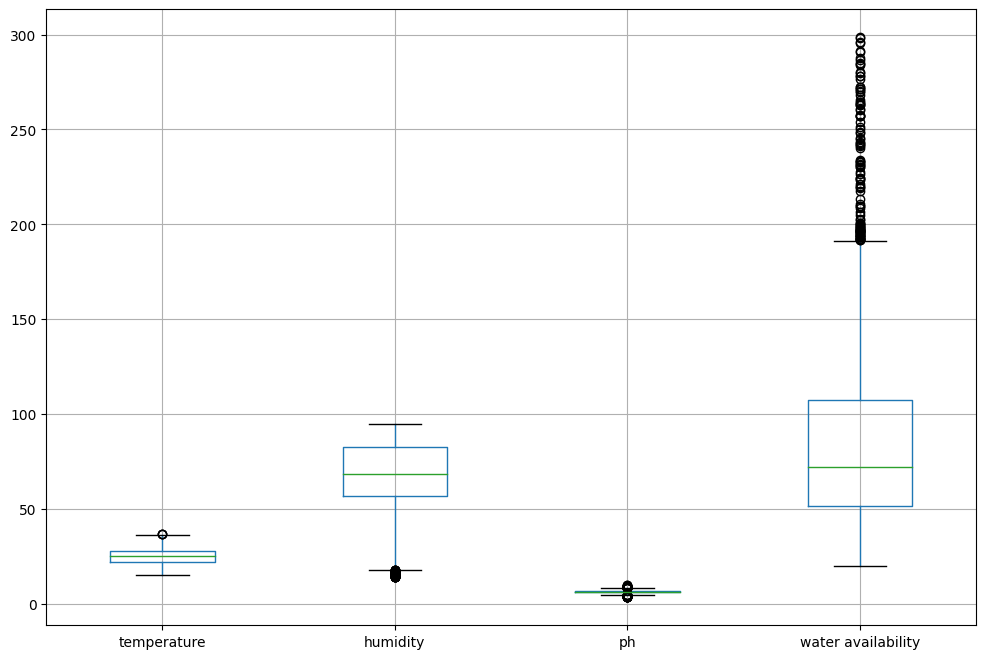

Histogram after removing outliers


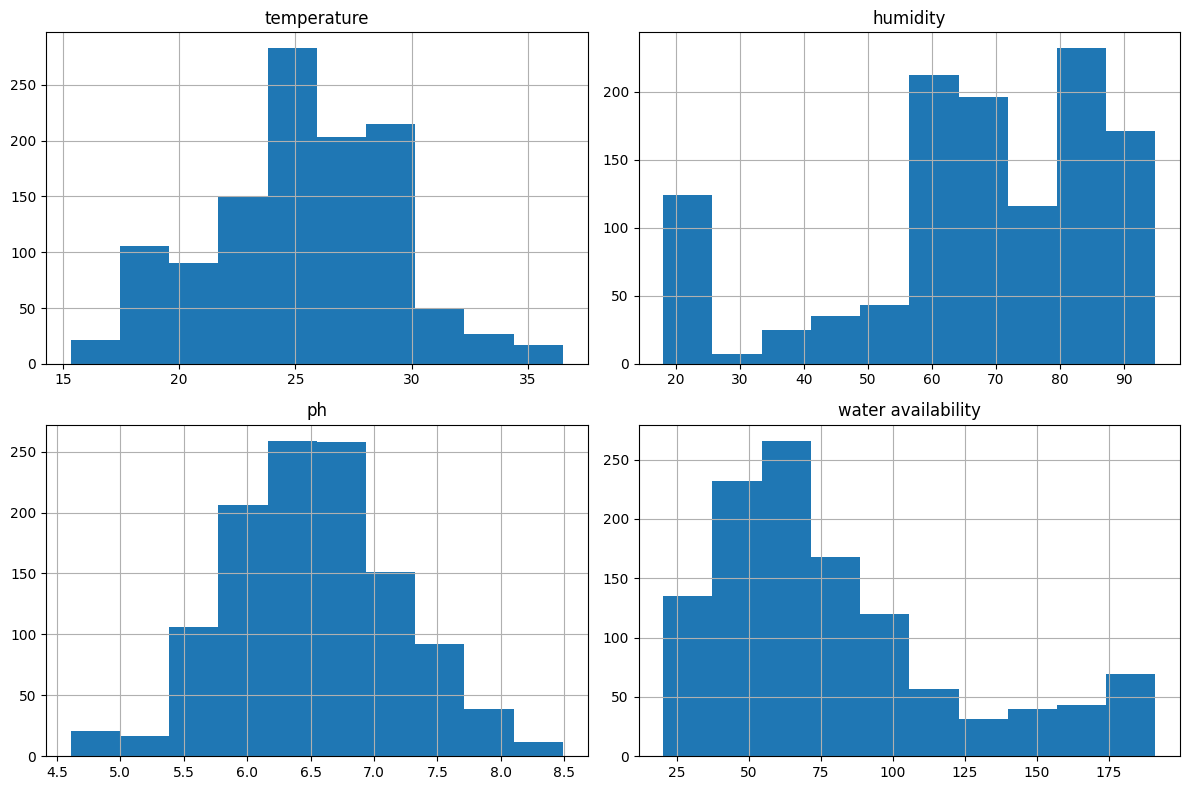

Box plot after removing outliers


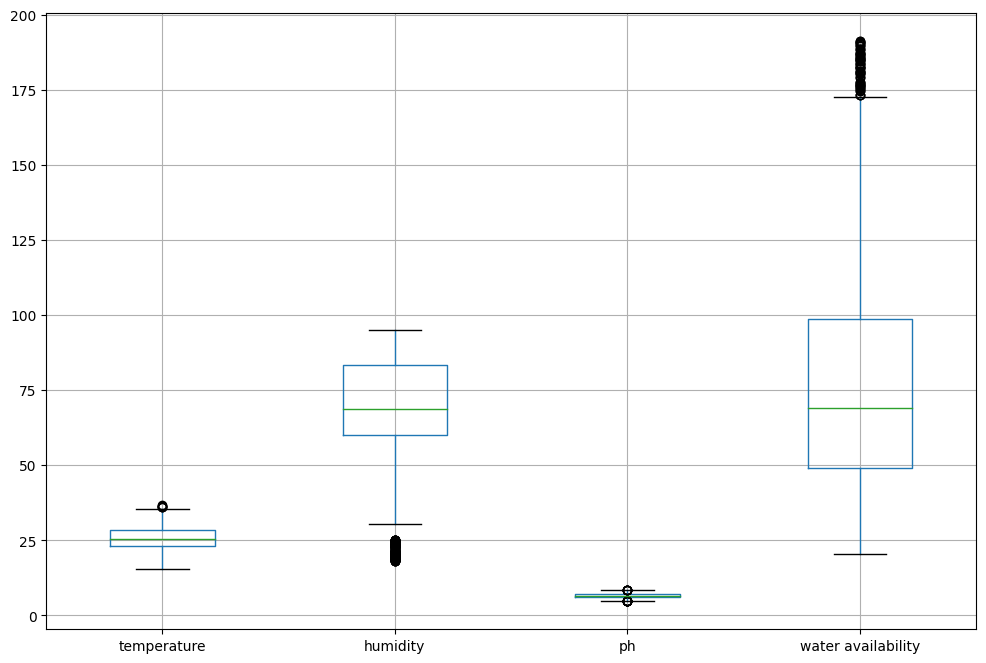

Available seasons in the training data: ['rainy', 'spring', 'summer', 'winter']
Epoch 1/50
93/93 [==============================] - 15s 44ms/step - loss: 2.1555 - accuracy: 0.2748 - val_loss: 1.8552 - val_accuracy: 0.3605
Epoch 2/50
93/93 [==============================] - 1s 16ms/step - loss: 1.5610 - accuracy: 0.4634 - val_loss: 1.3550 - val_accuracy: 0.5322
Epoch 3/50
93/93 [==============================] - 2s 17ms/step - loss: 1.2256 - accuracy: 0.6218 - val_loss: 1.0936 - val_accuracy: 0.6652
Epoch 4/50
93/93 [==============================] - 1s 13ms/step - loss: 0.9947 - accuracy: 0.6929 - val_loss: 0.8639 - val_accuracy: 0.7468
Epoch 5/50
93/93 [==============================] - 1s 11ms/step - loss: 0.8224 - accuracy: 0.7328 - val_loss: 0.7099 - val_accuracy: 0.7768
Epoch 6/50
93/93 [==============================] - 1s 11ms/step - loss: 0.6732 - accuracy: 0.7769 - val_loss: 0.5674 - val_accuracy: 0.8240
Epoch 7/50
93/93 [==============================] - 1s 11ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


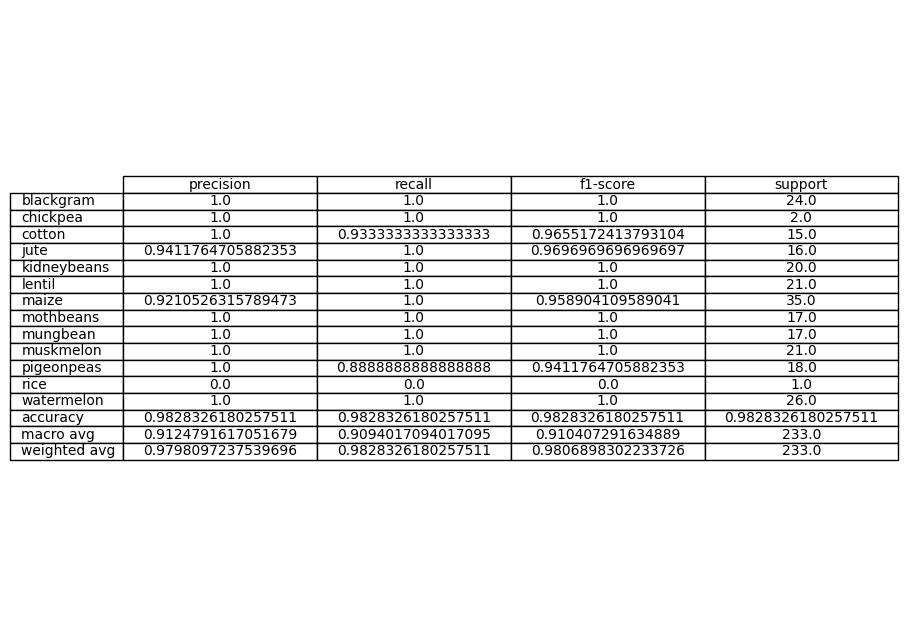

Plotting confusion matrix


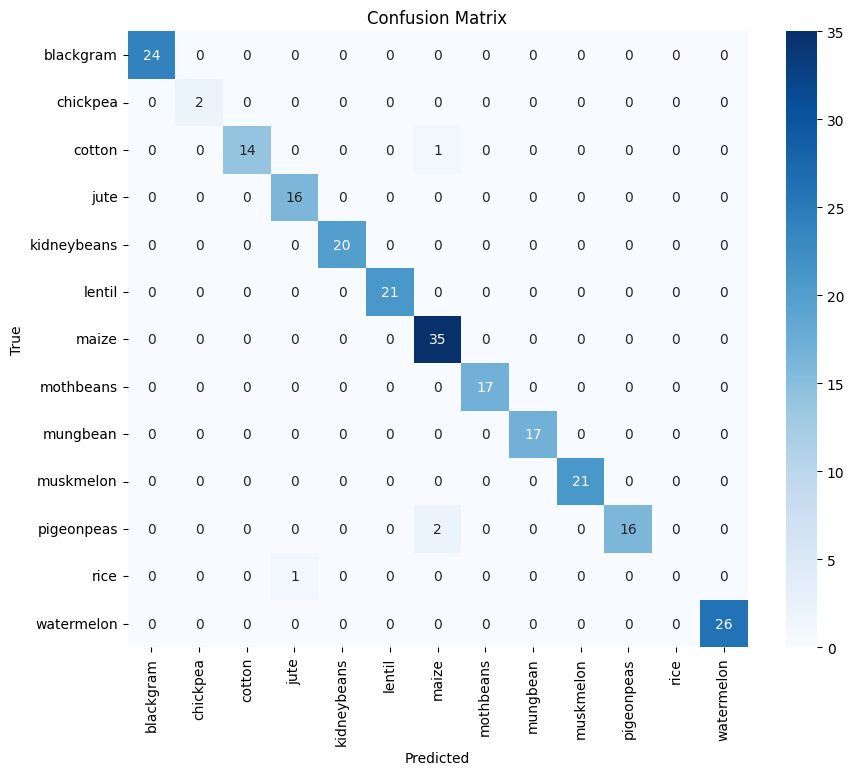

Plotting training and validation accuracy


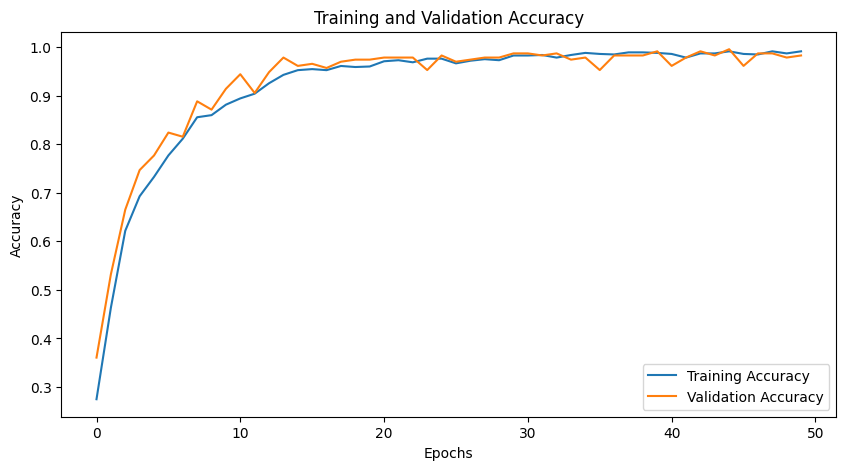

Plotting training and validation loss


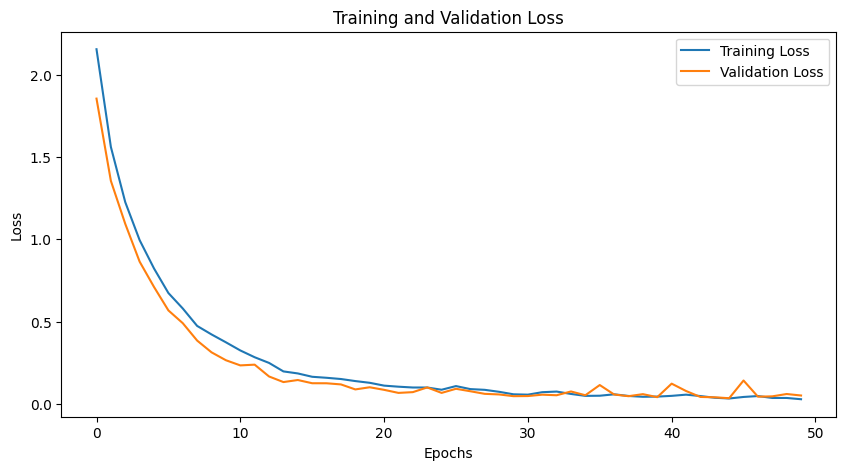

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
file_path = '/content/Crop_recommendation.csv'
df = pd.read_csv(file_path)

# Explore the data
print("Initial data view:")
print(df.head())
print("\nData information:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

# Check the actual values for season
print("\nActual season values in the data:")
print(df['season'].unique())

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df[['temperature', 'humidity', 'ph', 'water availability']] = imputer.fit_transform(df[['temperature', 'humidity', 'ph', 'water availability']])

# Plot histogram before removing outliers
print("Histogram before removing outliers")
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.savefig('histogram_before_outliers.png')
plt.show()

# Plot box plot before removing outliers
print("Box plot before removing outliers")
plt.figure(figsize=(12, 8))
df[['temperature', 'humidity', 'ph', 'water availability']].boxplot()
plt.savefig('boxplot_before_outliers.png')
plt.show()

# Handling outliers using IQR
Q1 = df[['temperature', 'humidity', 'ph', 'water availability']].quantile(0.25)
Q3 = df[['temperature', 'humidity', 'ph', 'water availability']].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[['temperature', 'humidity', 'ph', 'water availability']] < (Q1 - 1.5 * IQR)) | (df[['temperature', 'humidity', 'ph', 'water availability']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot histogram after removing outliers
print("Histogram after removing outliers")
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.savefig('histogram_after_outliers.png')
plt.show()

# Plot box plot after removing outliers
print("Box plot after removing outliers")
plt.figure(figsize=(12, 8))
df[['temperature', 'humidity', 'ph', 'water availability']].boxplot()
plt.savefig('boxplot_after_outliers.png')
plt.show()

# Convert categorical data to numerical
season_encoder = LabelEncoder()
df['season'] = season_encoder.fit_transform(df['season'])
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Print available seasons in the training data
print("Available seasons in the training data:", list(season_encoder.classes_))

# Select features and target
X = df[['temperature', 'humidity', 'ph', 'water availability', 'season']]
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape data to three-dimensional shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'LSTM Model Accuracy: {accuracy*100:.2f}%')

# Predict using the LSTM model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display classification report
print("Classification report:")
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Plot classification report as a table
print("Plotting classification report as a table")
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')
plt.savefig('classification_report.png')
plt.show()

# Plot confusion matrix
print("Plotting confusion matrix")
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Plot training and validation accuracy
print("Plotting training and validation accuracy")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy_plot.png')
plt.show()

# Plot training and validation loss
print("Plotting training and validation loss")
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('loss_plot.png')
plt.show()




In [2]:
# Function to predict crop based on user input
def predict_crop(temperature, humidity, ph, water_availability, season):
    # Check validity of entered season
    if season not in season_encoder.classes_:
        raise ValueError(f"The entered season '{season}' is not supported. Supported seasons are: {list(season_encoder.classes_)}")

    # Convert season to numerical value
    season_encoded = season_encoder.transform([season])[0]

    # Create input array
    input_data = np.array([[temperature, humidity, ph, water_availability, season_encoded]])

    # Scale the data
    input_data = scaler.transform(input_data)

    # Reshape data to three-dimensional shape
    input_data = np.reshape(input_data, (input_data.shape[0], input_data.shape[1], 1))

    # Predict using the model
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=1)

    # Convert result to crop name
    predicted_crop = label_encoder.inverse_transform(predicted_class)[0]
    return predicted_crop

# Example of using the function with user input values
temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
ph = float(input("Enter soil pH value: "))
water_availability = float(input("Enter water availability: "))
season = input("Enter season (e.g., 'rainy', 'winter', 'spring', 'summer'): ")

try:
    predicted_crop = predict_crop(temperature, humidity, ph, water_availability, season)
    print(f'Predicted crop: {predicted_crop}')
except ValueError as e:
    print(e)

Enter temperature: 26
Enter humidity: 80
Enter soil pH value: 5.6
Enter water availability: 200
Enter season (e.g., 'rainy', 'winter', 'spring', 'summer'): summer
1/1 [==============================] - 0s 20ms/step
Predicted crop: rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
